In [39]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [40]:
"""df = pd.read_csv("coin_Bitcoin.csv",parse_dates=["Date"]).drop(["Name","Symbol","SNo"],axis=1)
df.shape"""
df = pd.read_csv("BTC-USD.csv",parse_dates=["Date"])
df.set_index("Date",inplace=True) #
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-14,391.691986,411.697998,391.324005,400.869995,400.869995,38491500
2014-10-15,400.954987,402.226990,388.765991,394.773010,394.773010,25267100
2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,26990000
2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700
2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800
...,...,...,...,...,...,...
2024-08-30,59388.601563,59896.886719,57768.531250,59119.476563,59119.476563,32292756405
2024-08-31,59117.480469,59432.593750,58768.785156,58969.898438,58969.898438,12403470760
2024-09-01,58969.800781,59062.070313,57217.824219,57325.488281,57325.488281,24592449997


In [41]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [42]:
"""df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df["Date"] = pd.to_datetime(df["Date"])"""

'df[\'Date\'] = df[\'Date\'].dt.strftime(\'%Y-%m-%d\')\ndf["Date"] = pd.to_datetime(df["Date"])'

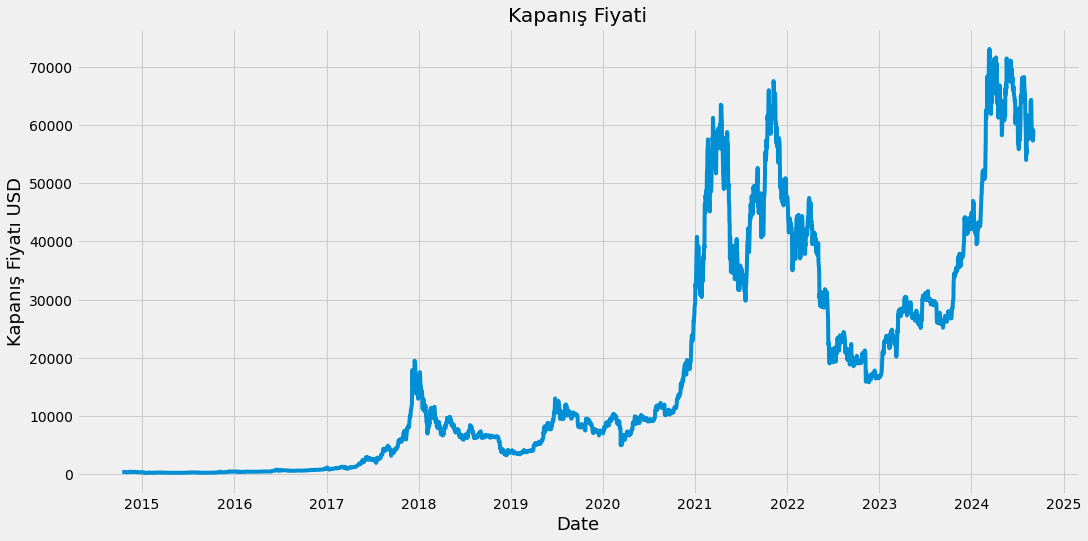

In [43]:
plt.figure(figsize=(16,8))
plt.title('Kapanış Fiyati')
plt.plot(df["Close"])
plt.xlabel('Date',fontsize =18)
plt.ylabel('Kapanış Fiyatı USD',fontsize =18)
plt.show()

In [44]:
data  = df.filter(["Close"])

dataset  = data.values
train_data_len = math.ceil(len(dataset)*.8)
train_data_len

2891

In [45]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data  =scaler.fit_transform(dataset)

scaled_data

array([[0.00305556],
       [0.00297193],
       [0.00280436],
       ...,
       [0.78385672],
       [0.80836783],
       [0.79265017]])

In [46]:
train_data = scaled_data[0:train_data_len,:]
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)


[array([0.00305556, 0.00297193, 0.00280436, 0.00282085, 0.00292624,
       0.00290024, 0.00280832, 0.00285812, 0.00281262, 0.00247326,
       0.00247227, 0.00232038, 0.00242233, 0.00239881, 0.0024623 ,
       0.00216017, 0.00229341, 0.00219762, 0.00202517, 0.00202713,
       0.00204993, 0.00209023, 0.00221359, 0.00234807, 0.00225377,
       0.00229592, 0.00253974, 0.00258995, 0.00260052, 0.0033668 ,
       0.00332804, 0.0030137 , 0.00271626, 0.00287741, 0.00287091,
       0.00270343, 0.00277691, 0.00246535, 0.00236944, 0.00239786,
       0.00259885, 0.00272679, 0.00270549, 0.00260978, 0.00262761,
       0.00272057, 0.00270745, 0.00274251, 0.00275895, 0.00278734,
       0.00270086, 0.00262671, 0.00272615, 0.00269777, 0.00270202,
       0.00252116, 0.00238825, 0.00230795, 0.00236475, 0.00239268])]
[0.00232181727222519]
[array([0.00305556, 0.00297193, 0.00280436, 0.00282085, 0.00292624,
       0.00290024, 0.00280832, 0.00285812, 0.00281262, 0.00247326,
       0.00247227, 0.00232038, 0.002

In [47]:
x_train,y_train = np.array(x_train) , np.array(y_train)

In [48]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2831, 60, 1)

In [49]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\MY COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [51]:
model.fit(x_train,y_train,batch_size=5,epochs=3)

Epoch 1/3
567/567 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - loss: 0.0026
Epoch 2/3
567/567 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 6.1135e-04
Epoch 3/3
567/567 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 5.2722e-04


In [52]:
test_data  = scaled_data[train_data_len-60:,:]

x_test = []
y_test = dataset[train_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [53]:
x_test = np.array(x_test)

In [54]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [55]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [56]:
rmse = np.sqrt( np.mean( predictions- y_test) ** 2)
rmse

148.63887736997918

C:\Users\MY COMPUTER\AppData\Local\Temp\ipykernel_1880\2928523314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["predictions"] = predictions


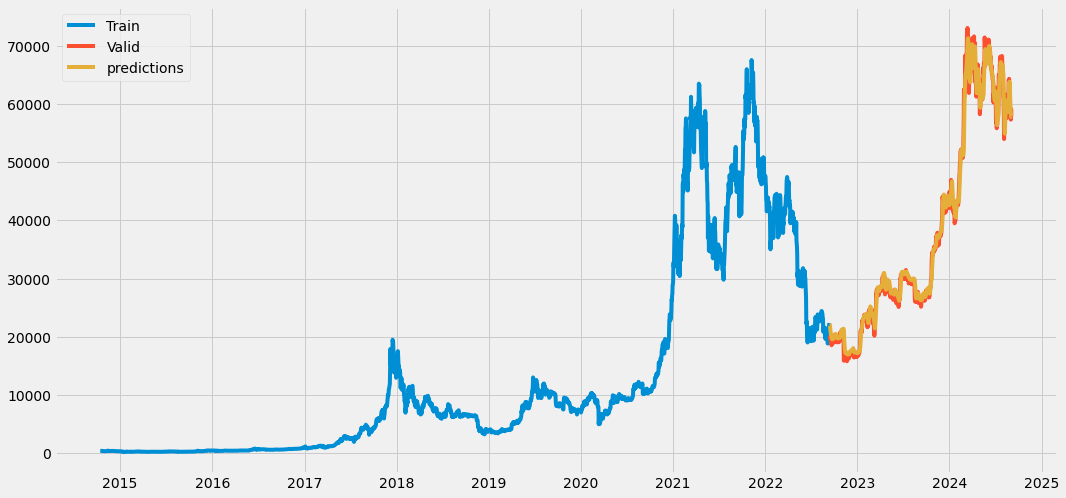

In [57]:
train = data[:train_data_len]
valid    = data[train_data_len:]

valid["predictions"] = predictions

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Valid','predictions'])